### Inlcudes

In [1]:
import sklearn as sk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import xgboost as xgb
import tqdm
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score

### Datos
Con el fin de reducir información redundante, eliminamos la columna de Municipio, clase socio-económica y el día de la semana. Esto debido a que todas las entradas en la información pertenecen a la misma entidad municipal.

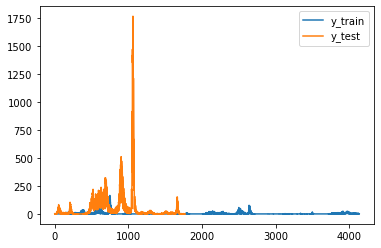

,indicador_movilidad,Casos Covid,indicador_recarga,PIB
0,0.870064,0,0.711413,16295.0
1,0.937769,0,1.416292,16295.0
2,1.000409,0,1.014513,16295.0
3,0.938584,0,0.931978,16295.0
4,0.952193,0,0.969102,16295.0


In [113]:
data = pd.read_csv("base_completa.csv")
data.drop(["Municipio", "dia_semana", "fecha"], inplace=True, axis=1)
data.dropna(inplace=True)
data["PIB"] = data["PIB"].str.replace(",", "")
data["PIB"] = data["PIB"].astype(float)

target = "Casos Covid"
y = np.asarray(data[target]).flatten()
X = data.drop([target], axis=1)

percentage = 0.7
X_train = X[:int(len(X) * percentage)]
y_train = y[:int(len(y) * percentage)]
# Pick remaining percentage as test data
X_test = X[int(len(X) * percentage):]
y_test = y[int(len(y) * percentage):]
plt.plot(y_train, label="y_train")
plt.plot(y_test, label="y_test")
plt.legend()
plt.show()
data.head()

### XGBoost Regression

In [114]:
regression = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.05,
                                objective='reg:squarederror', tree_method='hist')
regression.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Testing

MSE:  21770.5525769875
RMSE:  147.54847534619765


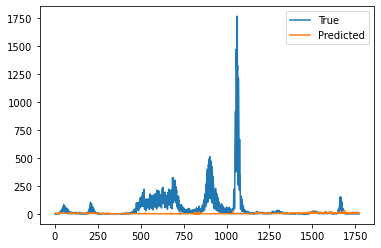

In [116]:
y_pred = regression.predict(X_test)
y_true = y_test
MSE = sk.metrics.mean_squared_error(y_true, y_pred)
RMSE = np.sqrt(MSE)
R_squared = sk.metrics.r2_score(y_true, y_pred)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

plt.plot(y_true, label="True")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()

In [122]:
# Print importance of features
importance = pd.DataFrame(
    {'feature': X_train.columns, 'importance': regression.feature_importances_})
importance.sort_index(ascending=False, inplace=True)
importance

,feature,importance
2,PIB,0.446181
1,indicador_recarga,0.217992
0,indicador_movilidad,0.335827
